In [78]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import feature_selection
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['grid.color'] = 'lightgrey'

In [79]:
jobs = pd.read_csv('Data/fake_job_postings.csv')
jobs.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [80]:
jobs['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [81]:
jobs['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [82]:
jobs.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [83]:
jobs.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [84]:
jobs['department'] = jobs['department'].fillna(jobs['department'].mode()[0])

In [85]:
jobs.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Sales,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Sales,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [86]:
# imputation transformer to fill missing values

# impute missing categorical data with 'Missing'
data_cat_imp = SimpleImputer(strategy='constant', fill_value='Missing')
cat_imp_feature = ["title","location","department","salary_range","company_profile","description","requirements","benefits",
                 "employment_type","required_experience","required_education","industry","function"]

# Filling numberical values through existing value
data_num_imp = SimpleImputer(strategy='constant',fill_value=None)
num_imp_feature = ["job_id","telecommuting","has_company_logo","has_questions","fraudulent"]

# Transform into column
data_imp_trans = ColumnTransformer([('data_cat_imp', data_cat_imp, cat_imp_feature), 
                                 ('data_num_imp', data_num_imp, num_imp_feature)])

# Transforming and assigning the data
transformed_data = data_imp_trans.fit_transform(jobs)

In [87]:
transformed_data

array([['Marketing Intern', 'US, NY, New York', 'Marketing', ..., 1, 0,
        0],
       ['Customer Service - Cloud Video Production', 'NZ, , Auckland',
        'Success', ..., 1, 0, 0],
       ['Commissioning Machinery Assistant (CMA)', 'US, IA, Wever',
        'Sales', ..., 1, 0, 0],
       ...,
       ['Project Cost Control Staff Engineer - Cost Control Exp - TX',
        'US, TX, Houston', 'Sales', ..., 0, 0, 0],
       ['Graphic Designer', 'NG, LA, Lagos', 'Sales', ..., 0, 1, 0],
       ['Web Application Developers', 'NZ, N, Wellington', 'Engineering',
        ..., 1, 1, 0]], dtype=object)

In [88]:
# Transforming the data into a dataframe
df_jobs_transformed = pd.DataFrame(transformed_data,
                                  columns = ["title","location","department","salary_range","company_profile","description",
                                  "requirements","benefits", "employment_type","required_experience","required_education",
                                  "industry","function","job_id","telecommuting","has_company_logo","has_questions",
                                  "fraudulent"])

In [89]:
df_jobs_transformed.head(400)

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,job_id,telecommuting,has_company_logo,has_questions,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,Missing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Missing,Other,Internship,Missing,Missing,Marketing,1,0,1,0,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Missing,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,Missing,Marketing and Advertising,Customer Service,2,0,1,0,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Sales,Missing,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Missing,Missing,Missing,Missing,Missing,Missing,3,0,1,0,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Missing,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,4,0,1,0,0
4,Bill Review Manager,"US, FL, Fort Worth",Sales,Missing,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,5,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Systems Analyst,"US, WA, Seattle",Sales,Missing,RHB Recruitment Ltd is a business process outs...,Need a Systems Analyst with Telecom Billing ex...,"Billing experienceLocation: Seattle, WAStart: ...",Missing,Contract,Missing,Missing,Missing,Missing,396,0,0,0,0
396,IT System Engineer,"LT, VL, Vilnius",IT Solution,Missing,Missing,SERVER ADMINISTRATORDo you want to:Manage the ...,"We expect from you:Be fluent in English, have ...",We offer:Being part of competition with world ...,Missing,Missing,Missing,Missing,Missing,397,0,1,0,0
397,UI Engineer,"US, IL, Chicago",Sales,75000-110000,Kin is a hosted HR management app used by smal...,Kin is seeking a UI engineer to join our small...,Who we’re looking forYou are a front-end nativ...,"In addition to a competitive base salary, we o...",Full-time,Mid-Senior level,Missing,Information Technology and Services,Engineering,398,1,1,1,0
398,VP of Product,"US, PA, Philadelphia",Sales,Missing,"Founded in 2009 by early LinkedIn employees, P...",The VP of Product Management is responsible fo...,Bachelor’s degree (Master’s is preferable) and...,Opportunity to work with an extremely cohesive...,Full-time,Mid-Senior level,Missing,Information Technology and Services,Product Management,399,0,1,0,0


In [90]:
df_jobs_transformed.isna().sum()

title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
job_id                 0
telecommuting          0
has_company_logo       0
has_questions          0
fraudulent             0
dtype: int64

/home/atlas/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


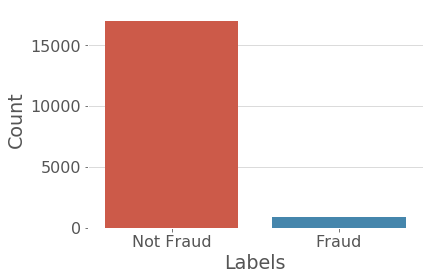

In [91]:
g = sns.countplot(df_jobs_transformed.fraudulent)
g.set_xticklabels(['Not Fraud','Fraud'])
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [92]:
df_jobs_transformed.dtypes

title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
job_id                 object
telecommuting          object
has_company_logo       object
has_questions          object
fraudulent             object
dtype: object

In [93]:
df_jobs_transformed = df_jobs_transformed[df_jobs_transformed['location'].str.contains('US')]

In [94]:
loc_split = []

for loc in df_jobs_transformed.location:
    loc_split.append(loc.split(','))
    
loc_split = pd.DataFrame(loc_split)
loc_split = loc_split[[1,2]]
loc_split = loc_split.rename(columns={1:"State",2:"City"})

In [95]:
df_jobs_transformed = df_jobs_transformed.reset_index()
df_jobs = df_jobs_transformed.join(loc_split)

In [98]:
df_jobs = df_jobs[['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'State', 'City']]
df_jobs.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,State,City
0,1,Marketing Intern,"US, NY, New York",Marketing,Missing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Missing,0,1,0,Other,Internship,Missing,Missing,Marketing,0,NY,New York
1,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Sales,Missing,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Missing,0,1,0,Missing,Missing,Missing,Missing,Missing,0,IA,Wever
2,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Missing,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,DC,Washington
3,5,Bill Review Manager,"US, FL, Fort Worth",Sales,Missing,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth
4,6,Accounting Clerk,"US, MD,",Sales,Missing,Missing,Job OverviewApex is an environmental consultin...,Missing,Missing,0,0,0,Missing,Missing,Missing,Missing,Missing,0,MD,


In [100]:
df_jobs = df_jobs[df_jobs['City'].notna()]
df_jobs = df_jobs[df_jobs['State'].notna()]
df_jobs['state_city'] = df_jobs['State'] + ',' + df_jobs['City']

In [101]:
df_jobs.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,State,City,state_city
0,1,Marketing Intern,"US, NY, New York",Marketing,Missing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Missing,0,...,0,Other,Internship,Missing,Missing,Marketing,0,NY,New York,"NY, New York"
1,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Sales,Missing,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Missing,0,...,0,Missing,Missing,Missing,Missing,Missing,0,IA,Wever,"IA, Wever"
2,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Missing,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,DC,Washington,"DC, Washington"
3,5,Bill Review Manager,"US, FL, Fort Worth",Sales,Missing,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth,"FL, Fort Worth"
4,6,Accounting Clerk,"US, MD,",Sales,Missing,Missing,Job OverviewApex is an environmental consultin...,Missing,Missing,0,...,0,Missing,Missing,Missing,Missing,Missing,0,MD,,"MD,"


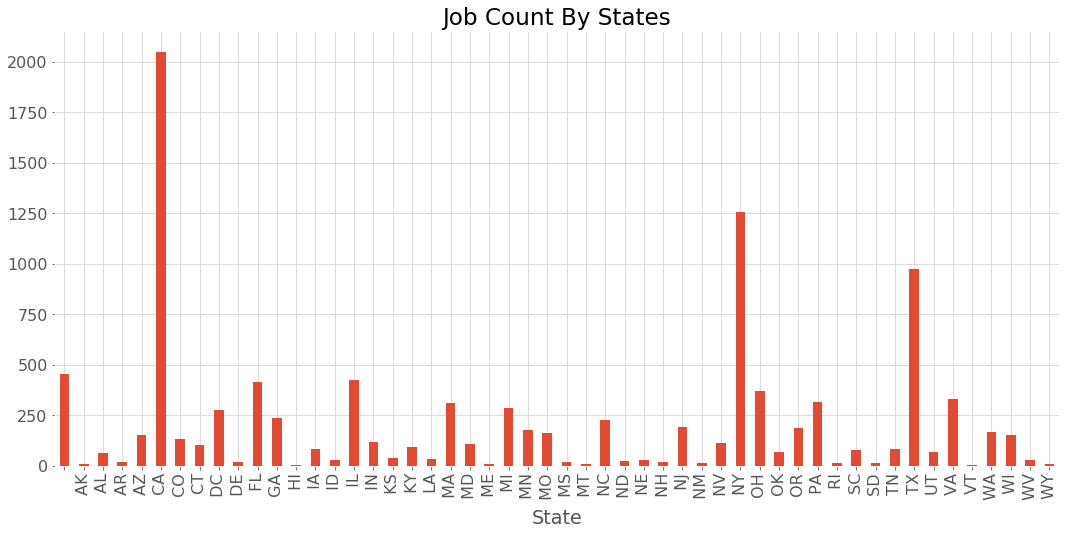

In [108]:
plt.figure(figsize=(18,8))
df_jobs.groupby('State').fraudulent.count().plot(kind='bar',title='Job Count By States')

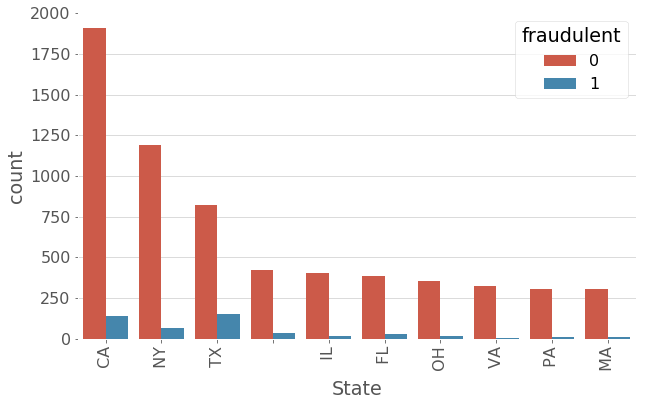

In [110]:
plt.figure(figsize=(10,6))
sns.countplot(x='State', data=df_jobs, hue="fraudulent", order=df_jobs['State'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

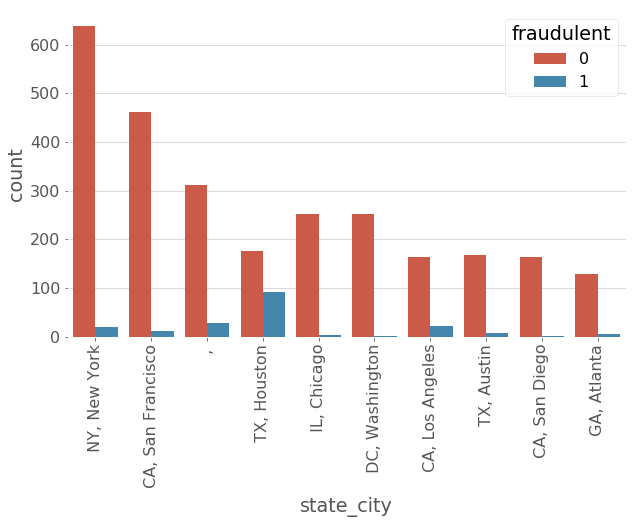

In [113]:
plt.figure(figsize=(10,6))
sns.countplot(x='state_city', data=df_jobs, hue="fraudulent", order=df_jobs['state_city'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

In [120]:
location_ratio = round(df_jobs[df_jobs.fraudulent ==1].groupby('state_city').state_city.count() / df_jobs[df_jobs.fraudulent == 0].groupby('state_city').state_city.count(), 2)
location_ratio = pd.DataFrame({'state_city':location_ratio.index, 'ratio':location_ratio.values})

In [121]:
df_jobs = df_jobs.merge(location_ratio)

In [124]:
df_jobs.isna().sum()

job_id                    0
title                     0
location                  0
department                0
salary_range              0
company_profile           0
description               0
requirements              0
benefits                  0
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           0
required_experience       0
required_education        0
industry                  0
function                  0
fraudulent                0
State                     0
City                      0
state_city                0
ratio                  4828
dtype: int64

In [125]:
df_jobs.ratio.fillna(0, inplace=True)

In [126]:
location_ratio_plot = location_ratio[location_ratio.ratio >= 1]

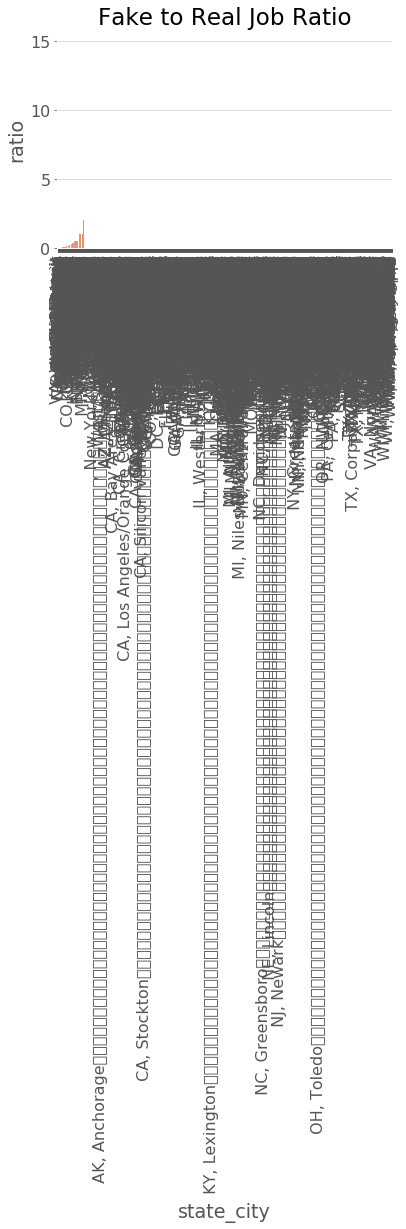

In [128]:
sns.barplot(data=location_ratio.sort_values(by='ratio'), x='state_city',y='ratio')
plt.xticks(rotation=90)
plt.title('Fake to Real Job Ratio')
plt.show()

## **Imbalanced Classes**

When classes are imbalanced, we need to resample. <br>
We have to decide if we're going to oversample or undersample

In [47]:
# class count
class_count_0, class_count_1 = df_jobs_transformed['fraudulent'].value_counts()

# Separate the classes
class_0 = df_jobs_transformed[df_jobs_transformed['fraudulent'] == 0]
class_1 = df_jobs_transformed[df_jobs_transformed['fraudulent'] == 1]
print('class_0:', class_0.shape)
print('class_1 :', class_1.shape)

class_0: (17014, 18)
class_1 : (866, 18)


## 1. Random under-sampling

Total class of 1 and 0: 0    866
1    866
Name: fraudulent, dtype: int64


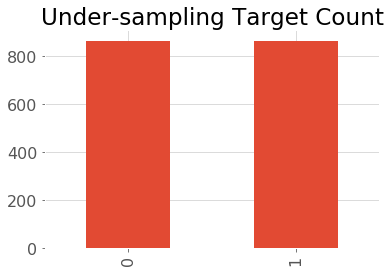

In [50]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print('Total class of 1 and 0:', test_under['fraudulent'].value_counts())
test_under['fraudulent'].value_counts().plot(kind='bar', title = 'Under-sampling Target Count')

## 2. Random over-sampling

Total class of 1 and 0: 1    17014
0    17014
Name: fraudulent, dtype: int64


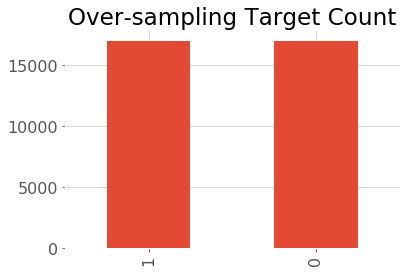

In [54]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print('Total class of 1 and 0:', test_over['fraudulent'].value_counts())
test_over['fraudulent'].value_counts().plot(kind='bar', title = 'Over-sampling Target Count')

In [56]:
df_jobs_oversample = test_over

In [58]:
df_jobs_oversample.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,job_id,telecommuting,has_company_logo,has_questions,fraudulent
17714,Payroll Data Coordinator Positions - Earn $100...,"US, TX, Abbott",Sales,Missing,Missing,We are a full-service marketing and staffing f...,RequirementsAll you need is access to the Inte...,This is an entry level position and we offer f...,Missing,Missing,Missing,Missing,Missing,17715,1,0,0,1
4605,Collection Representative II,"US, TX, DALLAS",COLLECTION DEPT,30000-45000,The Accion story began more than 100 years ag...,The individual occupying this position must be...,Maintain attention and concentration for exten...,FULL- TIME BENEFITS,Full-time,Entry level,High School or equivalent,Financial Services,Customer Service,4606,0,1,1,1
6881,Contract Recruitment Specialist,"US, TX, Houston",Engineering,Missing,Missing,Establish a functional client / service relat...,Job RequirementsFunctional Requirements:Conduc...,Missing,Missing,Missing,Missing,Missing,Missing,6882,0,0,1,1
14001,Urgent Jobs (Part Time Workers Needed),"AU, NSW, Sydney",Sales,Missing,Missing,Urgent Jobs (Part Time Workers Needed)You can ...,No any experience required.,Missing,Part-time,Missing,Missing,Missing,Missing,14002,0,0,0,1
5472,Research Engineer Data Science,"US, CA, San Mateo",Engineering,Missing,#URL_ddb080358fa5eecf5a67c649cfb4ffc343c484389...,Qualified candidates are encouraged to apply d...,Position requirements: Quickly learning new ar...,Our core values drive our culture. This is wha...,Full-time,Mid-Senior level,Master's Degree,Marketing and Advertising,Engineering,5473,0,1,1,1


In [78]:
X = df_jobs_oversample.drop('fraudulent', axis=1)
y = df_jobs_oversample.fraudulent
y = y.astype('int')

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)